<a href="https://colab.research.google.com/github/ThisIsFarhan/Langgraph-tutorials/blob/main/Simple_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

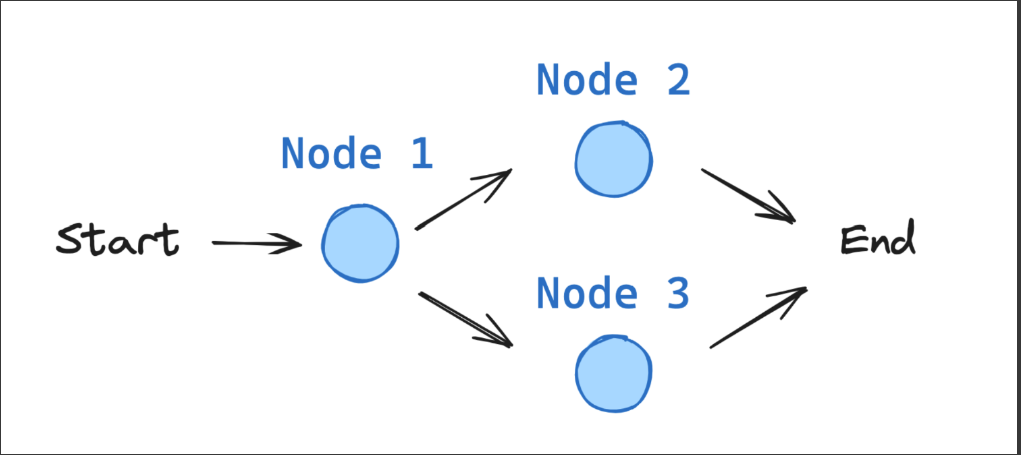

In [53]:
!pip install langgraph

In [70]:
from typing import TypedDict

class State(TypedDict): #The State schema serves as the input schema for all Nodes and Edges in the graph.
  graph_state:str

In [81]:
#Definition of each node. Each node is a python function with "state" as the first argument. Each node can access the "graph_state" as defined in the "State" schema above

def node1(state):
  print("entered node 1")
  return {"graph_state" : state["graph_state"] + " -> node 1"}

def node2(state):
  print("entered node 2")
  return {"graph_state":state["graph_state"] + " -> node 2 with 50% chance"}

def node3(state):
    print("entered node 3")
    return {"graph_state":state["graph_state"] + " -> node 3 with 50% chance"}

In [82]:
#conditional edge definition
import random
from typing import Literal

def decide_node(state) -> Literal["node2","node3"]:

  usr_input = state["graph_state"] #current graph state can be used to decide the next node

  if random.random() < 0.5:
    return "node2"

  return "node3"

In [83]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(State)
builder.add_node("node1", node1)
builder.add_node("node2", node2)
builder.add_node("node3", node3)

# Logic
builder.add_edge(START, "node1")
builder.add_conditional_edges("node1", decide_node)
builder.add_edge("node2", END)
builder.add_edge("node3", END)


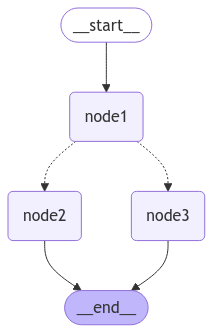

In [84]:
from IPython.display import Image, display
# Add
graph = builder.compile()
# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [88]:
graph.invoke({"graph_state":"Input invokation"}) #invokation sets the initial state of the graph

entered node 1
entered node 3


{'graph_state': 'Input invokation -> node 1 -> node 3 with 50% chance'}